In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# import some data to play with
df = pd.read_csv("data.csv",header=None)
X = df[[0,1,2,3,4,5,6]].copy(deep=True)
y = df[[7]].copy(deep=True)
print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

Number of data points :: 110
Number of features :: 7


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
y=le.transform(y)
decode=le.inverse_transform([0,1,2,3,4,5])
decode

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['koti3752@gmail.com', 'ksudha814@gmail.com',
       'sauravsen111@gmail.com', 'shauryakhurana809@gmail.com',
       'spraveekumar123456789@gmail.com', 'www.premsakore@gmail.com'], dtype=object)

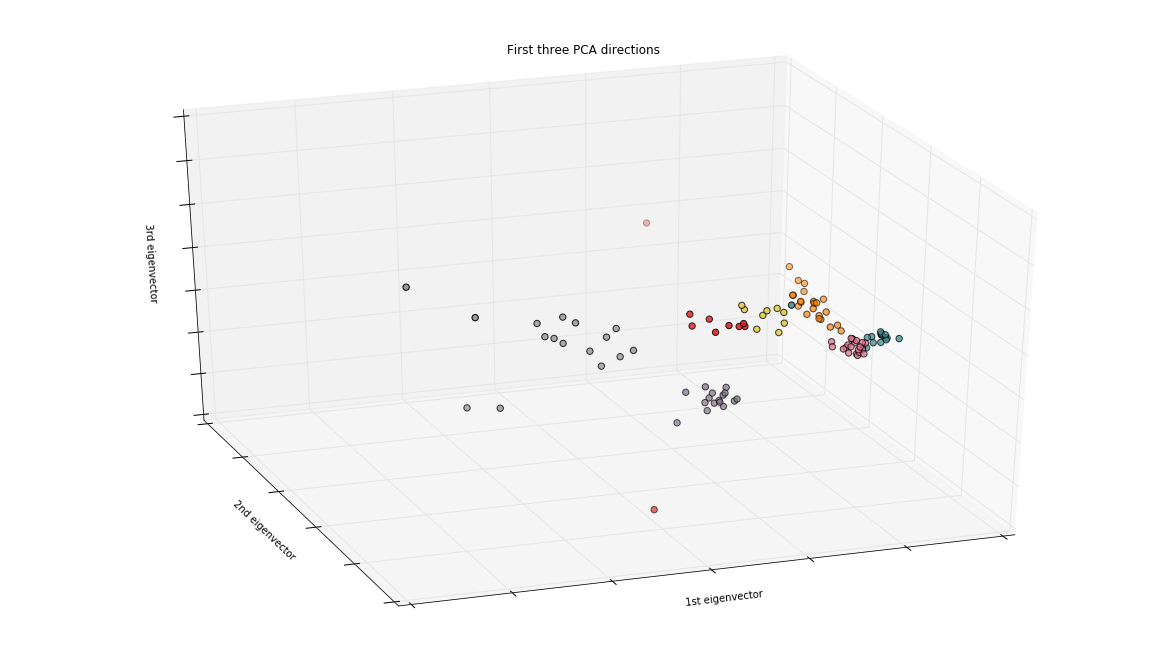

The number of features in the new subspace is  3


In [49]:
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])

In [50]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[-1.68687663 -1.3745967 ] 1


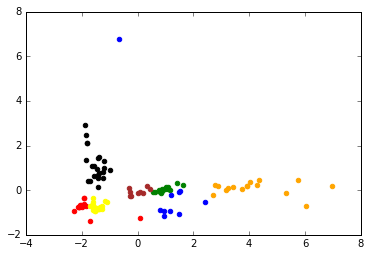

In [51]:
X_reduced2 = PCA(n_components=2).fit_transform(X_scaled)
print(X_reduced2[0],y[0])
j=0
for i in y:
    if(i==0):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="blue") 
    elif(i==1):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="red")
    elif(i==2):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="green")
    elif(i==3):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="black")
    elif(i==4):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="brown")
    elif(i==5):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="yellow")
    elif(i==6):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="orange")
    elif(i==7):
        plt.scatter(X_reduced2[j][0],X_reduced2[j][1],color="purple")
    j+=1
    #print(X_reduced2[0],X_reduced2[1])
    #print(i)


In [52]:
from sklearn import svm
#X_reduced2 = PCA(n_components=2).fit_transform(X_scaled)
svm = svm.SVC(C=0.5, kernel='linear')
svm.fit(X_reduced2, y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/home/shaurya/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/shaurya/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


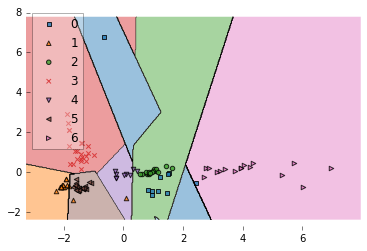

In [53]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_reduced2, y, clf=svm, legend=2)

In [54]:
import math
import statistics

def sort_by_dist(x,y):
    sx=statistics.median(x)
    sy=statistics.median(y)
    temp=[]
    for i in range(len(x)):
        ans=math.sqrt((x[i]-sx)**2+((y[i]-sy)**2))
        temp.append(ans)
    temp.sort()
    ind=int(len(temp)*0.8)
    th=temp[ind]
    print(ind,th)
    outx=[]
    print(len(temp))
    outy=[]
    for i in range(len(x)):
        ans=math.sqrt((x[i]-sx)**2+((y[i]-sy)**2))
        if(ans<th):
            outx.append(x[i])
            outy.append(y[i])
            #print(ans)
    #print(outx)
    #print(outx,outy)   
    return outx,outy

In [55]:
import numpy as np

final_listx=[]
final_listy=[]
final_listans=[]

for i in np.unique(y):
    com_listx=[]
    com_listy=[]
    for j in range(len(X_reduced2)):
        if(y[j]==i):
            com_listx.append(X_reduced2[j][0])
            com_listy.append(X_reduced2[j][1])
    #print(len(com_listx))
    ox,oy=sort_by_dist(com_listx,com_listy)
    #print(ox)
    final_listx.extend(ox)
    final_listy.extend(oy)
   
    for j in range(len(ox)):
        final_listans.append(i)
#final_listx    
   

8 1.2523966576597554
10
12 0.41124840402146556
15
12 0.3302822780765364
16
17 0.7914181858582118
22
7 0.4049584851455253
9
17 0.2332871851236903
22
12 1.4310328644758459
16


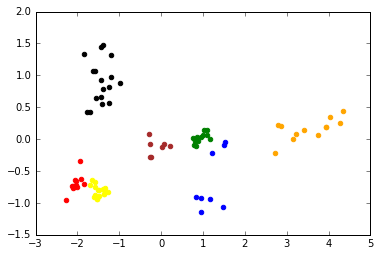

In [56]:

j=0
for i in final_listans:
    if(i==0):
        plt.scatter(final_listx[j],final_listy[j],color="blue") 
    elif(i==1):
        plt.scatter(final_listx[j],final_listy[j],color="red")
    elif(i==2):
        plt.scatter(final_listx[j],final_listy[j],color="green")
    elif(i==3):
        plt.scatter(final_listx[j],final_listy[j],color="black")
    elif(i==4):
        plt.scatter(final_listx[j],final_listy[j],color="brown")
    elif(i==5):
        plt.scatter(final_listx[j],final_listy[j],color="yellow")
    elif(i==6):
        plt.scatter(final_listx[j],final_listy[j],color="orange")
    
    j+=1

In [57]:
final_x=tuple(zip(final_listx,final_listy))

In [58]:
final_x=np.asarray(final_x) 
final_y=np.asarray(final_listans) 

/home/shaurya/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/shaurya/.local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


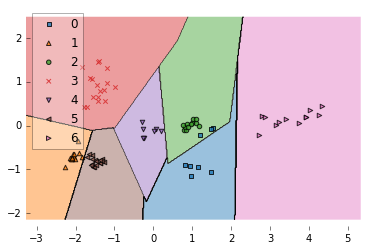

In [59]:
from sklearn import svm
#X_reduced2 = PCA(n_components=2).fit_transform(X_scaled)
svm = svm.SVC(C=0.9, kernel='linear')
svm.fit(final_x, final_listans)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(final_x, final_y, clf=svm, legend=2)

In [60]:
print(X_reduced2[0],y[0])
a=np.asarray(X_reduced2[0])
svm.predict(a.reshape(1,-1))

[-1.68687663 -1.3745967 ] 1


array([5])